# Group Project Proposal: 
# Analysis of the relationship between average age for committing homicide and geological location


## Introduction:

There has been an increase in the homicide rate in the U.S over the last couple of years, Ousey et al. suggest it is due to the increase in the immigration rate in the US, however, Fingerhut et al. (1998) suggest that there is a connection between homicide rate with age, race, sex and the level of urbanization. Our group has been interested in this topic and we found a dataset called ”Homicide Reports, 1980-2014“. This dataset includes murders from the FBI's Supplementary Homicide Report with more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, and ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and the weapon used.

The question that we are trying to answer is whether living in Los Angeles or New York would affect the average age for committing a homicide after 2000. We chose these 2 cities due to the fact that New York is the city with the most homicide in the eastern US and Los Angeles in the western US, and we thought that they are representative of each side. Our hypothesis is that there will be a difference in the age of committing homicide between New York and Los Angeles. We will compare the mean and median age of committing a homicide in these 2 cities and generate a confidence interval to see whether there will be a significant difference for us to make a conclusion.

## Preliminary Results:

### Loading library

In [1]:
library(cowplot)
library(datateachr)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



### Reading data(Because our data is from Kaggle, so instead of reading it from web, we read it locally.)

In [2]:
data <- read.csv("data.csv")
head(data)

,X,Record.ID,Agency.Code,Agency.Name,Agency.Type,City,State,Year,Month,Incident,⋯,Victim.Ethnicity,Perpetrator.Sex,Perpetrator.Age,Perpetrator.Race,Perpetrator.Ethnicity,Relationship,Weapon,Victim.Count,Perpetrator.Count,Record.Source
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,1,402708,AR00400,Benton,Sheriff,Benton,Arkansas,2000,February,1,⋯,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
2,2,402712,AR00403,Siloam Springs,Municipal Police,Benton,Arkansas,2000,June,1,⋯,Hispanic,Male,21,White,Hispanic,Acquaintance,Knife,0,0,FBI
3,3,402713,AR00403,Siloam Springs,Municipal Police,Benton,Arkansas,2000,July,1,⋯,Hispanic,Male,24,Asian/Pacific Islander,Unknown,Wife,Handgun,0,0,FBI
4,4,402718,AR01400,Columbia,Sheriff,Columbia,Arkansas,2000,February,1,⋯,Not Hispanic,Male,16,White,Not Hispanic,Acquaintance,Blunt Object,0,1,FBI
5,5,402726,AR01801,West Memphis,Municipal Police,Crittenden,Arkansas,2000,January,1,⋯,Not Hispanic,Male,40,Black,Not Hispanic,Girlfriend,Firearm,0,0,FBI
6,6,402727,AR01801,West Memphis,Municipal Police,Crittenden,Arkansas,2000,January,2,⋯,Not Hispanic,Male,39,Black,Not Hispanic,Wife,Firearm,0,0,FBI


In [3]:
str(data)

'data.frame':	84253 obs. of  25 variables:
 $ X                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Record.ID            : int  402708 402712 402713 402718 402726 402727 402752 402754 402755 402765 ...
 $ Agency.Code          : chr  "AR00400" "AR00403" "AR00403" "AR01400" ...
 $ Agency.Name          : chr  "Benton" "Siloam Springs" "Siloam Springs" "Columbia" ...
 $ Agency.Type          : chr  "Sheriff" "Municipal Police" "Municipal Police" "Sheriff" ...
 $ City                 : chr  "Benton" "Benton" "Benton" "Columbia" ...
 $ State                : chr  "Arkansas" "Arkansas" "Arkansas" "Arkansas" ...
 $ Year                 : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ Month                : chr  "February" "June" "July" "February" ...
 $ Incident             : int  1 1 1 1 1 2 1 3 1 1 ...
 $ Crime.Type           : chr  "Murder or Manslaughter" "Murder or Manslaughter" "Murder or Manslaughter" "Murder or Manslaughter" ...
 $ Crime.Solved         : chr  "No" "Yes"

### Wrangling data
We deselected all the columns that is irrelevant with our study and filtered out all the data with NA and unreasonable data(victim age higher than 200). 

In [4]:
clean_data <- data %>%
    filter(!is.na(Victim.Age),!is.na(Perpetrator.Age), Victim.Age != 0, Perpetrator.Age != 0, Victim.Age < 200) %>%
    select(-Record.ID:-Agency.Type, -State, -Incident, -Crime.Type, -Crime.Solved, -Victim.Sex, -Victim.Race:-Perpetrator.Sex, 
           -Perpetrator.Race:-Relationship, -Victim.Count:-Record.Source, -X)
LA_data <- clean_data %>%
    filter(City == "Los Angeles")
NY_data <- clean_data %>%
    filter(City == "New York")
head(LA_data)
cat("Los Angeles data population: ", nrow(LA_data))
head(NY_data)
cat("New York data population: ", nrow(NY_data))

,City,Year,Month,Victim.Age,Perpetrator.Age,Weapon
,<chr>,<int>,<chr>,<int>,<int>,<chr>
1,Los Angeles,2000,January,17,21,Handgun
2,Los Angeles,2000,January,26,52,Handgun
3,Los Angeles,2000,January,46,47,Blunt Object
4,Los Angeles,2000,February,50,33,Handgun
5,Los Angeles,2000,February,17,20,Handgun
6,Los Angeles,2000,February,70,34,Handgun


Los Angeles data population:  6100

,City,Year,Month,Victim.Age,Perpetrator.Age,Weapon
,<chr>,<int>,<chr>,<int>,<int>,<chr>
1,New York,2007,December,29,31,Firearm
2,New York,2007,January,16,21,Firearm
3,New York,2007,January,28,33,Knife
4,New York,2007,January,20,30,Firearm
5,New York,2007,February,36,42,Blunt Object
6,New York,2007,February,25,43,Firearm


New York data population:  1282

### Ploting data

In [5]:
LA_p_age_mean <- LA_data %>%
    summarize(mean = mean(Perpetrator.Age)) %>%
    pull()
LA_p_age_median <- LA_data %>%
    summarize(median = median(Perpetrator.Age)) %>%
    pull()
LA_p_age_sample_dist <- LA_data %>%
    ggplot(aes(x = Perpetrator.Age)) +
    geom_histogram(binwidth = 2) +
    geom_vline(xintercept = LA_p_age_mean) +
    annotate("text", x = 32.5, y = 890, label = "Mean") +
    annotate("text", x = 32.5, y = 860, label = round(LA_p_age_mean, 2)) +
    geom_vline(xintercept = LA_p_age_median, color = "red") +
    annotate("text", x = 20.5, y = 890, label = "Median", color = "red") +
    annotate("text", x = 20.5, y = 860, label = round(LA_p_age_median, 2), color = "red") +
    labs(x = "Perpetrator Age", title = "Perpetrator Age Sample Distribution of Los Angeles", y = "Count")

NY_p_age_mean <- NY_data %>%
    summarize(mean = mean(Perpetrator.Age)) %>%
    pull()
NY_p_age_median <- NY_data %>%
    summarize(median = median(Perpetrator.Age)) %>%
    pull()
NY_p_age_sample_dist <- NY_data %>%
    ggplot(aes(x = Perpetrator.Age)) +
    geom_histogram(binwidth = 2) +
    geom_vline(xintercept = NY_p_age_mean) +
    annotate("text", x = 34, y = 150, label = "Mean") +
    annotate("text", x = 34, y = 145, label = round(NY_p_age_mean, 2)) +
    geom_vline(xintercept = NY_p_age_median, color = "red") +
    annotate("text", x = 22, y = 150, label = "Median", color = "red") +
    annotate("text", x = 22, y = 145, label = round(NY_p_age_median, 2), color = "red") +
    labs(x = "Perpetrator Age", title = "Perpetrator Age Sample Distribution of New York", y = "Count")

### Analysis:
Comparing the ages of the perpetrators in two different cities, we can see that the shape of these two sample distributions is right-skewed(long right tail) with one peak. Similarly, two plots have similar peak at about 23. It is worth noting that the mean age of perpetrators in Los Angeles is a little bit wider than that in New York.

In [6]:
LA_v_age_mean <- LA_data %>%
    summarize(mean = mean(Victim.Age)) %>%
    pull()
LA_v_age_median <- LA_data %>%
    summarize(median = median(Victim.Age)) %>%
    pull()
LA_v_age_sample_dist <- LA_data %>%
    ggplot(aes(x = Victim.Age)) +
    geom_histogram(binwidth = 2) +
    geom_vline(xintercept = LA_v_age_mean) +
    annotate("text", x = 34.5, y = 540, label = "Mean") +
    annotate("text", x = 34.5, y = 520, label = round(LA_v_age_mean, 2)) +
    geom_vline(xintercept = LA_v_age_median, color = "red") +
    annotate("text", x = 22.5, y = 540, label = "Median", color = "red") +
    annotate("text", x = 22.5, y = 520, label = round(LA_v_age_median, 2), color = "red") +
    labs(x = "Victim Age", title = "Victim Age Sample Distribution of Los Angeles", y = "Count")

NY_v_age_mean <- NY_data %>%
    summarize(mean = mean(Victim.Age)) %>%
    pull()
NY_v_age_median <- NY_data %>%
    summarize(median = median(Victim.Age)) %>%
    pull()
NY_v_age_sample_dist <- NY_data %>%
    ggplot(aes(x = Victim.Age)) +
    geom_histogram(binwidth = 2) +
    geom_vline(xintercept = NY_v_age_mean) +
    annotate("text", x = 36, y = 120, label = "Mean") +
    annotate("text", x = 36, y = 115, label = round(NY_v_age_mean, 2)) +
    geom_vline(xintercept = NY_v_age_median, color = "red") +
    annotate("text", x = 24.5, y = 120, label = "Median", color = "red") +
    annotate("text", x = 24.5, y = 115, label = round(NY_v_age_median, 2), color = "red") +
    labs(x = "Victim Age", title = "Victim Age Sample Distribution of New York", y = "Count")

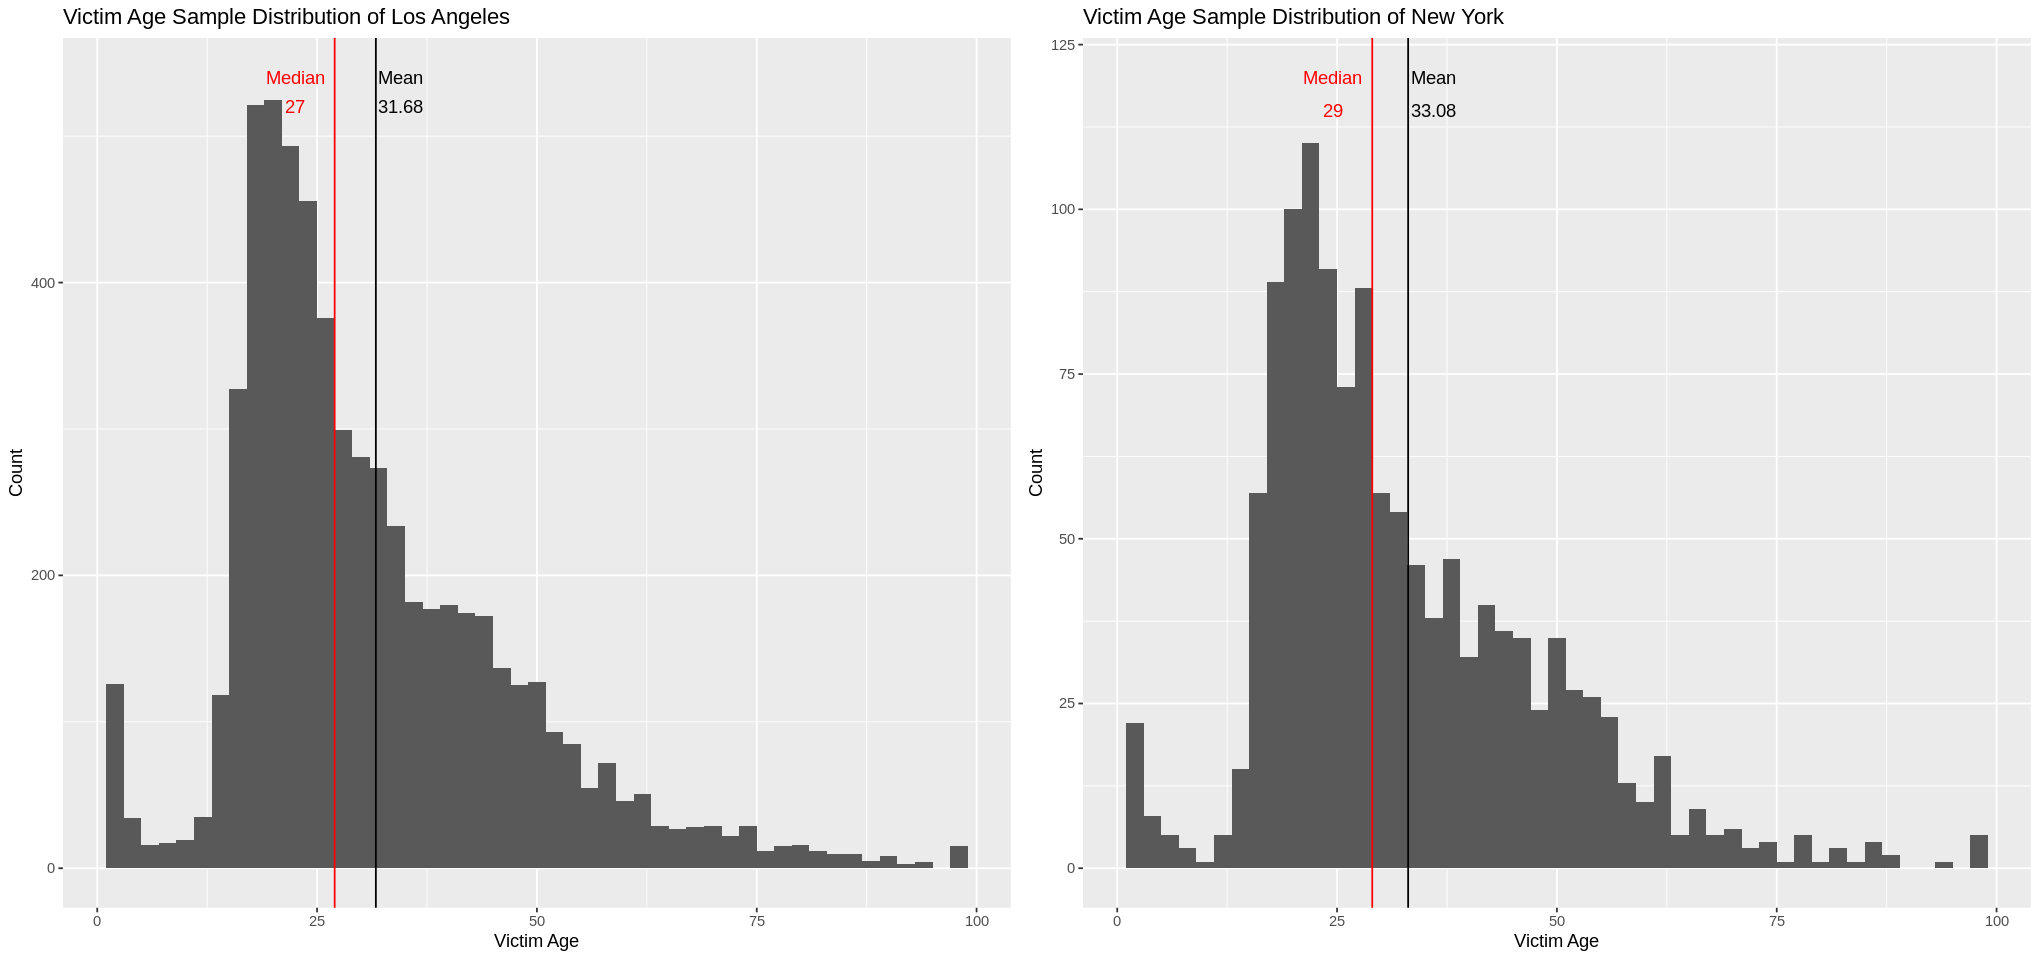

In [7]:
options(repr.plot.width = 17, repr.plot.height = 8)
plot_grid(LA_v_age_sample_dist, NY_v_age_sample_dist, ncol = 2)

### Analysis:
Comparing the ages of the victims in two different cities, we can see that the shape of these two sample distributions is right-skewed(long right tail) with two peaks, which can be considered bimodal plots. Similarly, the two highest points in both figures are at approximately 2 and 23. It is not hard to see that there is an outlier in both plots at about 98. Overall, the mean and median ages of the victims in New York are greater than those in Los Angeles.

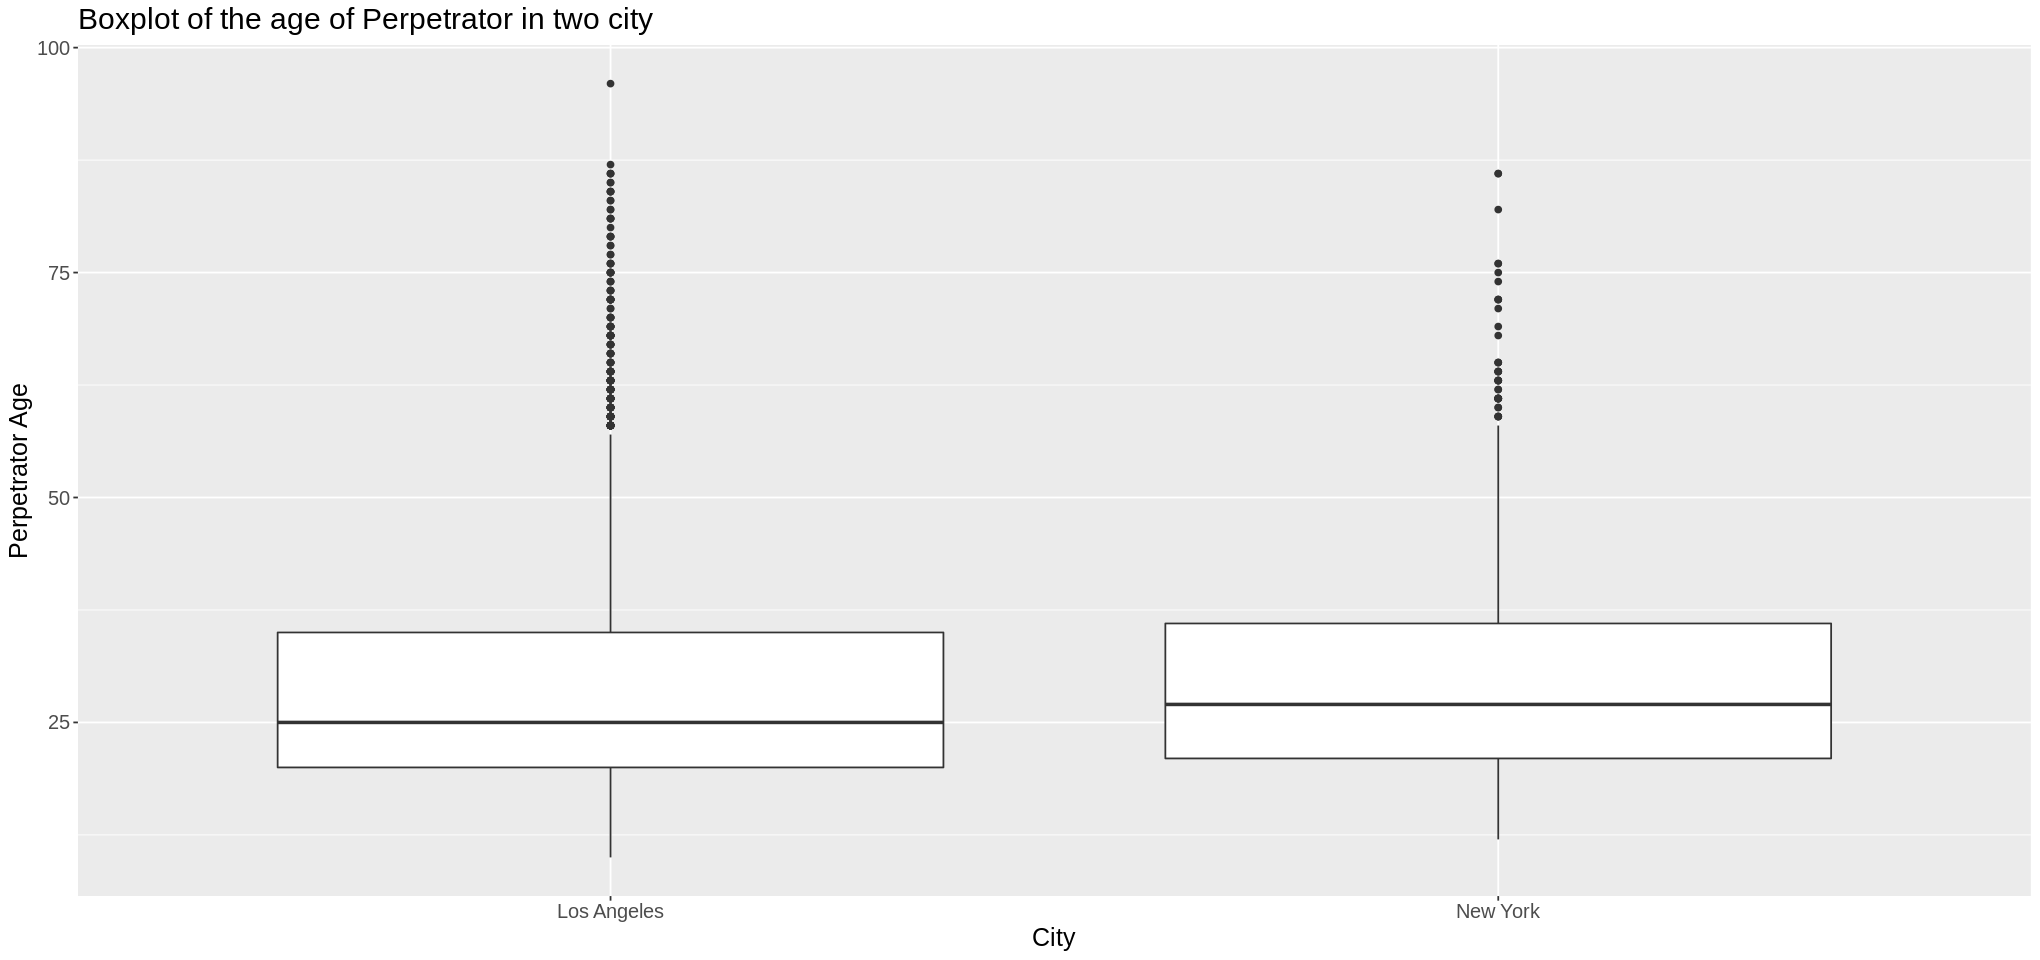

In [8]:
boxplots <- 
   clean_data %>%  
    filter(City %in% c("New York", "Los Angeles")) %>%
   ggplot(aes(x = City, y = Perpetrator.Age)) + 
   geom_boxplot() + 
   ylab("Perpetrator Age") +
   xlab("City") +
   ggtitle("Boxplot of the age of Perpetrator in two city") +
   theme(text = element_text(size=15))
boxplots

### Analysis:
The age range of perpetrators is almost same in both cities. The median age of perpetrators in Los Angeles is 25, but that in New York is slightly higher, at about 27. Notably, the age outliers in Los Angeles are wider than in New York, ranging from about 57 to 97. The extreme values range in New York ranges from 57 to 87. The boxplot indicates that the perpetrators in New York are older than those in Los Angeles. But we have to use a hypothesis test to confirm.

## Hypothesis Testing:

 Hypothesis 1: Perpetrator mean age difference 
- $H_0: \mu_1 - \mu_2 = 0$ vs $H_1: \mu_1 - \mu_2 \neq 0$
 
 Hypothesis 2:  Victim mean age difference
- $H_0: \mu_3 - \mu_4 = 0$ vs $H_1: \mu_3 - \mu_4 \neq 0$
 
 Hypothesis 3:  Proportion of teenager perpetrator difference
- $H_0: p_1 - p_2 = 0$ vs $H_1: p_1 - p_2 \neq 0$
 
 Hypothesis 4:  Proportion of teenager victim difference
- $H_0: p_3 - p_4 = 0$ vs $H_1: p_3 - p_4 \neq 0$

### Bootstrapping:

Hypothesis 1

Since we take two independent samples, one from each population. By independent samples, we mean that the individuals are selected independently in each population and we have known the samaple mean and sample standard deviation. We can use two-sample t-test to test the difference between two independent populations' means. However, the populations are not normally distributed, we need to rely on the CLT. Let $\mu_1$ be the mean age of perpetrators in Los Angeles, and let $\mu_2$ be the mean age of perpetrators in New York. We will perform hypothesis testing on $\mu_1 - \mu_2$ at a 5 % significance level. The null hypothesis is $\mu_1 = \mu_2$.

P value is:  0.001333333

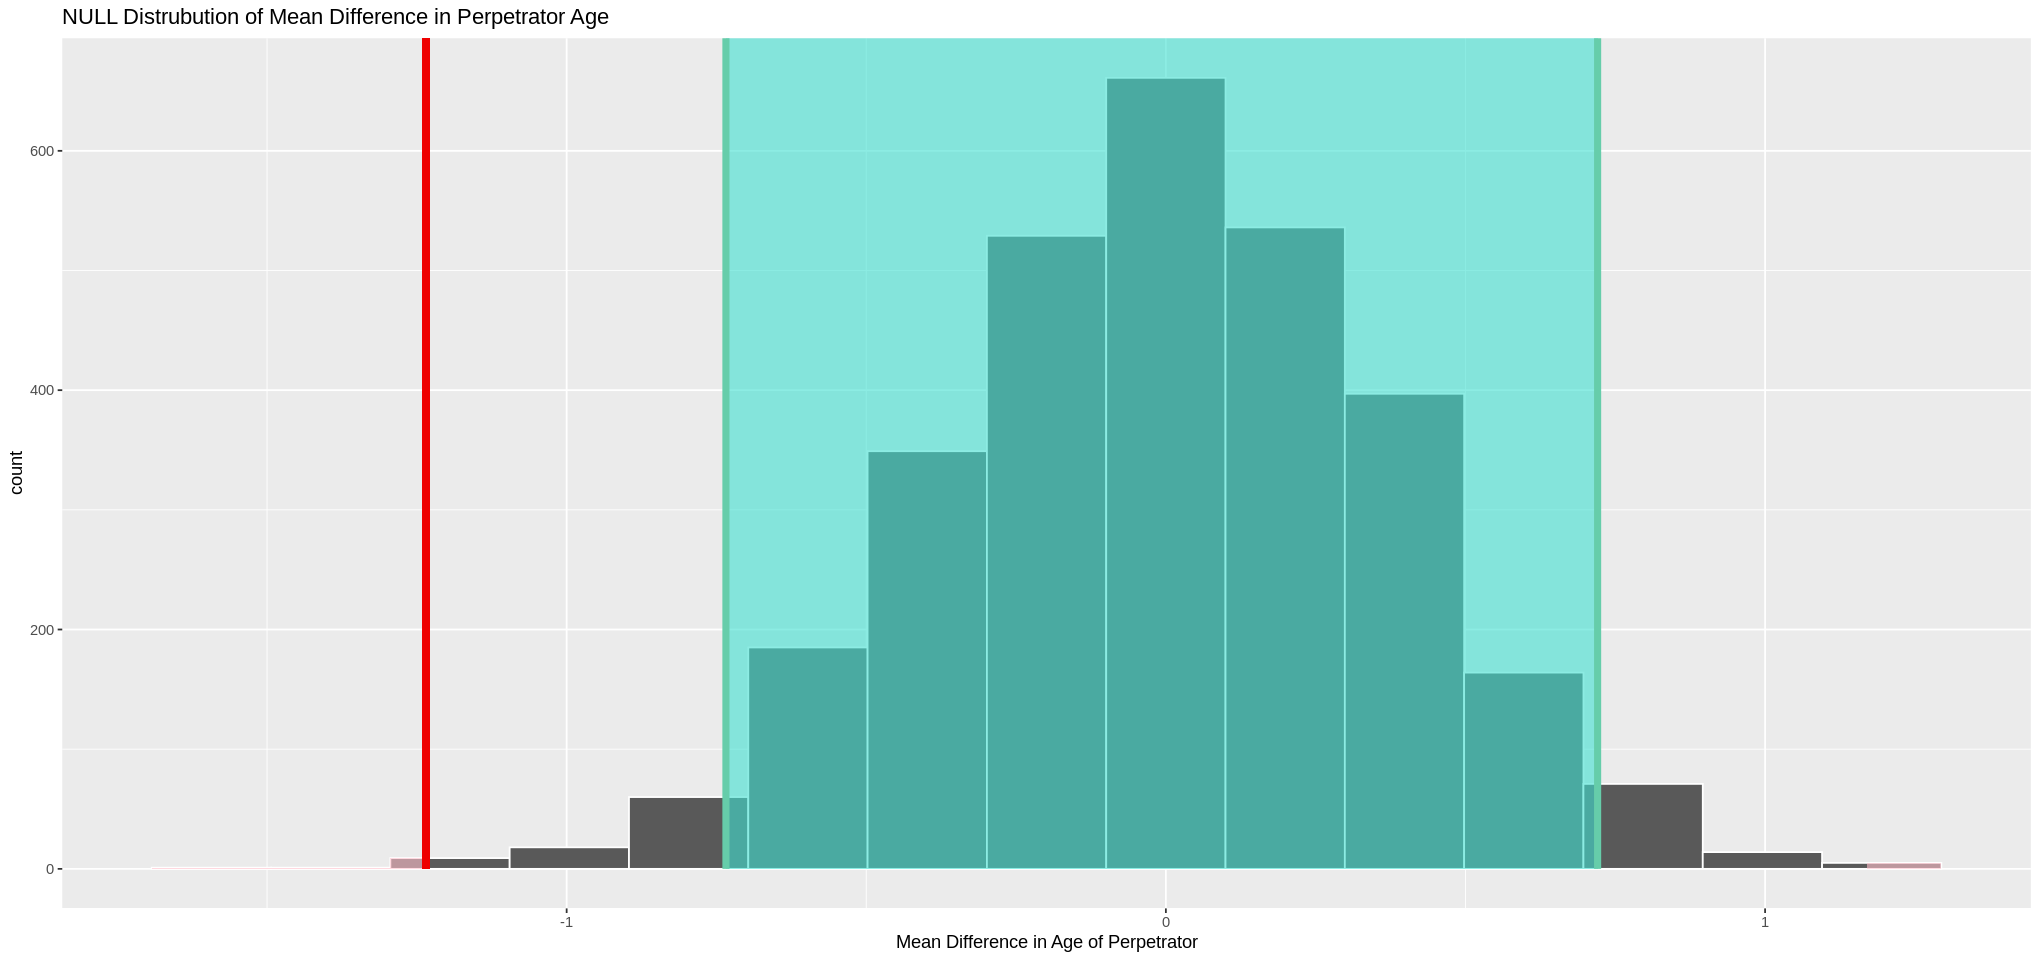

In [9]:
set.seed(2000)
obs_mean_perp_diff <- 
    clean_data %>% 
    filter(City %in% c("Los Angeles", "New York")) %>%
    group_by(City) %>% 
    summarise(mean = mean(Perpetrator.Age)) %>%
    pivot_wider(names_from = City, values_from = mean) %>%
    transmute(diff = `Los Angeles` - `New York`) %>%
    pull(diff)
null_model_perpetrator_mean <-  
   filter(clean_data, City %in% c("Los Angeles", "New York")) %>%
   specify(formula = Perpetrator.Age ~ City) %>% 
   hypothesize(null = "independence") %>% 
   generate(reps = 3000, type = "permute") %>% 
   calculate(stat="diff in means", order = c("Los Angeles", "New York"))
diff_in_perpetrator_means_ci <- null_model_perpetrator_mean %>%
    get_confidence_interval(level = 0.95, type = "percentile")
result_plot_perpetrator <- 
   null_model_perpetrator_mean %>%
   visualize() + 
   shade_confidence_interval(diff_in_perpetrator_means_ci) +
   shade_p_value(obs_stat = obs_mean_perp_diff, direction = "both") +
   labs(x = "Mean Difference in Age of Perpetrator", title = "NULL Distrubution of Mean Difference in Perpetrator Age")
p_value_mean_prep <- 
    null_model_perpetrator_mean %>% 
    get_p_value(obs_stat = obs_mean_perp_diff, direction = "both") %>%
    pull()
result_plot_perpetrator
cat("P value is: ", p_value_mean_prep)

Since the p-value is 0.001333333, which is lower than 5%.Therefore, we reject 𝐻0 at 5% significance level and conclude that there is a difference in the average age of perpetrators between the two cities.

Hypothesis 2

Similarly with the previous test, we can use two-sample t-test to test the average age difference of victims between two cities. However, the populations are also not normally distributed, we need to rely on the CLT. Let $\mu_3$ be the mean age of victims in Los Angeles, and let $\mu_4$ be the mean age of victims in New York. We will perform hypothesis testing on $\mu_3 - \mu_4$ at a 5 % significance level. The null hypothesis is $\mu_1 = \mu_2$.

P value is:  0.01

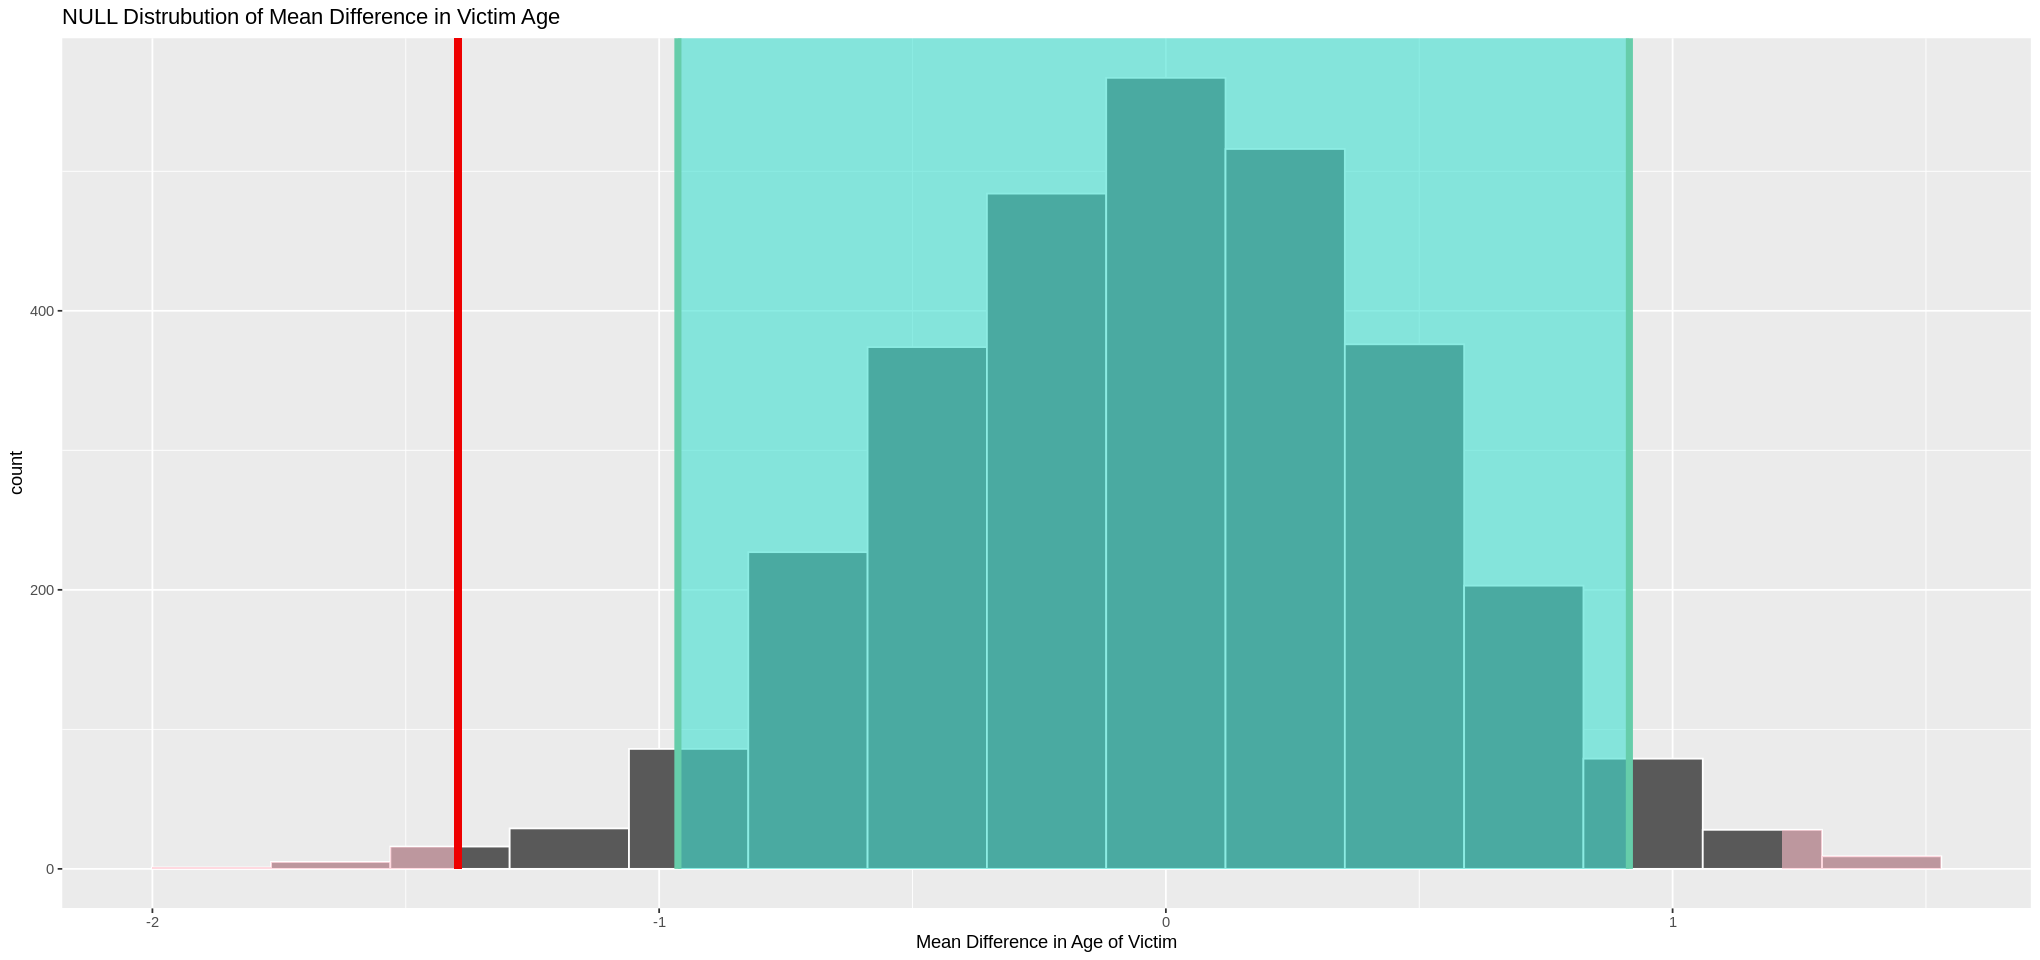

In [10]:
set.seed(2000)
obs_mean_vict_diff <- 
    clean_data %>% 
    filter(City %in% c("Los Angeles", "New York")) %>%
    group_by(City) %>% 
    summarise(mean = mean(Victim.Age)) %>%
    pivot_wider(names_from = City, values_from = mean) %>%
    transmute(diff = `Los Angeles` - `New York`) %>%
    pull(diff)
null_model_vict_mean <-  
   filter(clean_data, City %in% c("Los Angeles", "New York")) %>%
   specify(formula = Victim.Age ~ City) %>% 
   hypothesize(null = "independence") %>% 
   generate(reps = 3000, type = "permute") %>% 
   calculate(stat="diff in means", order = c("Los Angeles", "New York"))
diff_in_victim_means_ci <- null_model_vict_mean %>%
    get_confidence_interval(level = 0.95, type = "percentile")
result_plot_vict <- 
   null_model_vict_mean %>%
   visualize() + 
   shade_confidence_interval(diff_in_victim_means_ci) +
   shade_p_value(obs_stat = obs_mean_vict_diff, direction = "both") +
   labs(x = "Mean Difference in Age of Victim", title = "NULL Distrubution of Mean Difference in Victim Age")
p_value_mean_vict <- 
    null_model_vict_mean %>% 
    get_p_value(obs_stat = obs_mean_vict_diff, direction = "both") %>%
    pull()
result_plot_vict
cat("P value is: ", p_value_mean_vict)

Since the p-value is 0.01, which is lower than 5%.Therefore, we reject 𝐻0 at 5% significance level and conclude that there is a difference in the average age of victims between the two cities.

In [11]:
Hypothesis 3

We want to compare two proportions in the test. We are going to assume we have two independent random samples, one from each population.By independent samples, we mean that the individuals are selected 
We can use two-sample z-test to test the difference between two independent populations' proportions. However, the populations are not normally distributed, we need to rely on the CLT. Let $p_1$ be the proportion of teenager(13-17) perpetrators in Los Angeles, and let $p_2$ be he proportion of teenager(13-17) perpetrators in New York. We will perform hypothesis testing on $p_1 - p_2$ at a 5 % significance level. The null hypothesis is $p_1 = p_2$.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:12: unexpected numeric constant
1: Hypothesis 3
               ^


In [ ]:
teen_proportion_data <- clean_data %>%
    filter(City %in% c("Los Angeles", "New York")) %>%
    mutate(perpetrator_teen = between(Perpetrator.Age, 13, 17),
           victim_teen = between(Victim.Age, 13, 17)) %>%
    select("City", "perpetrator_teen", "victim_teen")
head(teen_proportion_data)

In [ ]:
set.seed(2000)
obs_diff_prop_prep <- 
    select(teen_proportion_data, -victim_teen) %>%
    group_by(perpetrator_teen, City) %>%
    tally() %>%
    spread(perpetrator_teen, n) %>%
    mutate(prop = `TRUE`/(`TRUE` + `FALSE`)) %>%
    select(-`TRUE`, -`FALSE`) %>%
    pivot_wider(names_from = City, values_from = prop) %>%
    transmute(stat = `Los Angeles` - `New York`)
prop_prep_null_distribution <- 
    select(teen_proportion_data, -victim_teen) %>%
    specify(formula = City ~ perpetrator_teen, success = "Los Angeles") %>%
    hypothesize(null = "independence") %>%
    generate(type = "permute", reps = 3000) %>%
    calculate(stat = "diff in props", order = c("TRUE", "FALSE"))
diff_in_prop_prep_ci <- prop_prep_null_distribution %>%
    get_confidence_interval(level = 0.95, type = "percentile")
prop_prep_result_plot <- 
    prop_prep_null_distribution %>%
    visualize() +
    shade_confidence_interval(diff_in_prop_prep_ci) +
    shade_p_value(obs_stat = obs_diff_prop_prep, direction = "both") +
    labs(x = "Proportion Difference in Teenager(13-17) Perpetrator", title = "NULL Distrubution of Proportion Difference in Teenager Perpetrator")
p_value <- prop_prep_null_distribution %>%
    get_p_value(obs_stat = obs_diff_prop_prep, direction = "both") %>%
    pull()
prop_prep_result_plot
cat("P value is: ", p_value)

Since the p-value is 0.982, which is higherer than 5%. Therefore, we do not have enough evidence to reject 𝐻0 at 5% significance level and conclude that there is no difference in the proportion of teenager perpetrators between the two cities.

Hypothesis 4

Similar with hypothesis3， we want to compare two proportions in the test. We are going to assume we have two independent random samples, one from each population.We can use two-sample z-test to test the  proportion of teenage victims in two cities. However, the populations are not normally distributed, we need to rely on the CLT. Let $p_3$ be the proportion of teenager(13-17) victims in Los Angeles, and let $p_4$ be he proportion of teenager(13-17) victims in New York. We will perform hypothesis testing on $p_3 - p_4$ at a 5 % significance level. The null hypothesis is $p_3 = p_4$.

In [ ]:
set.seed(2000)
obs_diff_prop_vict <- 
    select(teen_proportion_data, -perpetrator_teen) %>%
    group_by(victim_teen, City) %>%
    tally() %>%
    spread(victim_teen, n) %>%
    mutate(prop = `TRUE`/(`TRUE` + `FALSE`)) %>%
    select(-`TRUE`, -`FALSE`) %>%
    pivot_wider(names_from = City, values_from = prop) %>%
    transmute(stat = `Los Angeles` - `New York`)
prop_vict_null_distribution <- 
    select(teen_proportion_data, -perpetrator_teen) %>%
    specify(formula = City ~ victim_teen, success = "Los Angeles") %>%
    hypothesize(null = "independence") %>%
    generate(type = "permute", reps = 3000) %>%
    calculate(stat = "diff in props", order = c("TRUE", "FALSE"))
diff_in_prop_vict_ci <- prop_vict_null_distribution %>%
    get_confidence_interval(level = 0.95, type = "percentile")
prop_vict_result_plot <- 
    prop_vict_null_distribution %>%
    visualize() +
    shade_confidence_interval(diff_in_prop_vict_ci) +
    shade_p_value(obs_stat = obs_diff_prop_vict, direction = "both") +
    labs(x = "Proportion Difference in Teenager(13-17) Victim", title = "NULL Distrubution of Proportion Difference in Teenager Victim")
p_value <- prop_vict_null_distribution %>%
    get_p_value(obs_stat = obs_diff_prop_vict, direction = "both") %>%
    pull()
prop_vict_result_plot
cat("P value is: ", p_value)

Since the p-value is 0.3186667, which is higherer than 5%. Therefore, we do not have enough evidence to reject 𝐻0 at 5% significance level and conclude that there is no difference in the proportion of teenager victims between the two cities.

### Asymptotics:

In [ ]:
prep_summary <- 
     clean_data %>% 
     filter(City %in% c("Los Angeles", "New York")) %>% 
     group_by(City) %>% 
     summarise(sample_mean = mean(Perpetrator.Age), 
               sample_var = var(Perpetrator.Age), 
               n = n())
test_statistic <- 
   (prep_summary$sample_mean[2] - prep_summary$sample_mean[1]) / sqrt(prep_summary$sample_var[2] / prep_summary$n[2] + prep_summary$sample_var[1] / prep_summary$n[1])
v <- (prep_summary$sample_var[2] / prep_summary$n[2] + prep_summary$sample_var[1] / prep_summary$n[1])^2 / 
     (prep_summary$sample_var[2]^2 / (prep_summary$n[2]^2*(prep_summary$n[2]-1)) + prep_summary$sample_var[1]^2 / (prep_summary$n[1]^2*(prep_summary$n[1]-1)))
p_value <-2 * pt(test_statistic, v, lower.tail=FALSE)
cat("test statistic is:", test_statistic)
cat("\nP value is:", p_value)
t_test <- 
    tidy(
        t.test(x = select(LA_data,Perpetrator.Age),
               y = select(NY_data,Perpetrator.Age),
               alternative = "two.sided"))
t_test

In [ ]:
vict_summary <- 
     clean_data %>% 
     filter(City %in% c("Los Angeles", "New York")) %>% 
     group_by(City) %>% 
     summarise(sample_mean = mean(Victim.Age), 
               sample_var = var(Victim.Age), 
               n = n())
test_statistic <- 
   (vict_summary$sample_mean[2] - vict_summary$sample_mean[1]) / sqrt(vict_summary$sample_var[2] / vict_summary$n[2] + vict_summary$sample_var[1] / vict_summary$n[1])
v <- (vict_summary$sample_var[2] / vict_summary$n[2] + vict_summary$sample_var[1] / vict_summary$n[1])^2 / 
     (vict_summary$sample_var[2]^2 / (vict_summary$n[2]^2*(vict_summary$n[2]-1)) + vict_summary$sample_var[1]^2 / (vict_summary$n[1]^2*(vict_summary$n[1]-1)))
p_value <-2 * pt(test_statistic, v, lower.tail=FALSE)
cat("test statistic is:", test_statistic)
cat("\nP value is:", p_value)
t_test <- 
    tidy(
        t.test(x = select(LA_data,Victim.Age),
               y = select(NY_data,Victim.Age),
               alternative = "two.sided"))
t_test

In [ ]:
perpetrator_qnts <- 
    teen_proportion_data %>% 
    group_by(City) %>% 
    count(perpetrator_teen)  %>% 
    mutate(p = n/sum(n))
n1 <- 
    perpetrator_qnts %>% 
    filter(City == "Los Angeles") %>% 
    pull(n) %>% 
    sum()

n2 <- 
    perpetrator_qnts %>% 
    filter(City == "New York") %>% 
    pull(n) %>% 
    sum()

p1 <- 
    perpetrator_qnts %>% 
    filter(City == "Los Angeles" & perpetrator_teen == "TRUE") %>% 
    pull(p)

p2 <- 
    perpetrator_qnts %>% 
    filter(City == "New York" & perpetrator_teen == "TRUE") %>%
    pull(p)

p <- (n1 * p1 + n2*p2)/(n1 + n2)

test_statistic <- (p1 - p2) / (sqrt(p*(1-p)*(1/n1 + 1/n2)))
p_value <- 2 * pnorm(test_statistic, lower.tail = FALSE)
cat("test statistic is:", test_statistic)
cat("\nP value is:", p_value)
p_test <- tidy(
        prop.test(x = c(n1*p1, n2*p2), 
                  n = c(n1, n2),
                  correct = FALSE)) 
p_test

In [ ]:
victim_qnts <- 
    teen_proportion_data %>% 
    group_by(City) %>% 
    count(victim_teen)  %>% 
    mutate(p = n/sum(n))
n1 <- 
    victim_qnts %>% 
    filter(City == "Los Angeles") %>% 
    pull(n) %>% 
    sum()

n2 <- 
    victim_qnts %>% 
    filter(City == "New York") %>% 
    pull(n) %>% 
    sum()

p1 <- 
    victim_qnts %>% 
    filter(City == "Los Angeles" & victim_teen == "TRUE") %>% 
    pull(p)

p2 <- 
    victim_qnts %>% 
    filter(City == "New York" & victim_teen == "TRUE") %>%
    pull(p)

p <- (n1 * p1 + n2*p2)/(n1 + n2)

test_statistic <- (p1 - p2) / (sqrt(p*(1-p)*(1/n1 + 1/n2)))
p_value <- 2 * pnorm(test_statistic, lower.tail = FALSE)
cat("test statistic is:", test_statistic)
cat("\nP value is:", p_value)
p_test <- tidy(
        prop.test(x = c(n1*p1, n2*p2), 
                  n = c(n1, n2),
                  correct = FALSE)) 
p_test

## References:

Dataset: https://www.kaggle.com/datasets/murderaccountability/homicide-reports

Ousey, G. C., & Kubrin, C. E. (2014). Immigration and the changing nature of homicide in US cities, 1980-2010. Journal of Quantitative Criminology, 30(3), 453-483. doi:https://doi.org/10.1007/s10940-013-9210-5

Fingerhut LA, Ingram DD, Feldman JJ. Homicide Rates Among US Teenagers and Young Adults(1998): Differences by Mechanism, Level of Urbanization, Race, and Sex,1987 Through 1995. JAMA. 1998;280(5):423–427.     doi:10.1001/jama.280.5.423 
